In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
match = pd.read_csv("matches.csv")
delivery = pd.read_csv("deliveries.csv")

In [3]:
match.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [4]:
delivery.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179077,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


In [5]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [6]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

# EDA

 Match Analysis

In [7]:
# List of seasons

In [8]:
match['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

Includes Datas from 2008 to 2019

In [9]:
# First Match of IPL History

In [10]:
match.iloc[59]

id                                          60
season                                    2008
city                                 Bangalore
date                                2008-04-18
team1                    Kolkata Knight Riders
team2              Royal Challengers Bangalore
toss_winner        Royal Challengers Bangalore
toss_decision                            field
result                                  normal
dl_applied                                   0
winner                   Kolkata Knight Riders
win_by_runs                                140
win_by_wickets                               0
player_of_match                    BB McCullum
venue                    M Chinnaswamy Stadium
umpire1                              Asad Rauf
umpire2                            RE Koertzen
umpire3                                    NaN
Name: 59, dtype: object

The first match in the IPL history was held at Chinnaswamy Stadium, Bangalore. And its the home ground of Royal Challengers Bangalore. McCullum was the Man of the Match

In [11]:
# Season Wise IPL Match

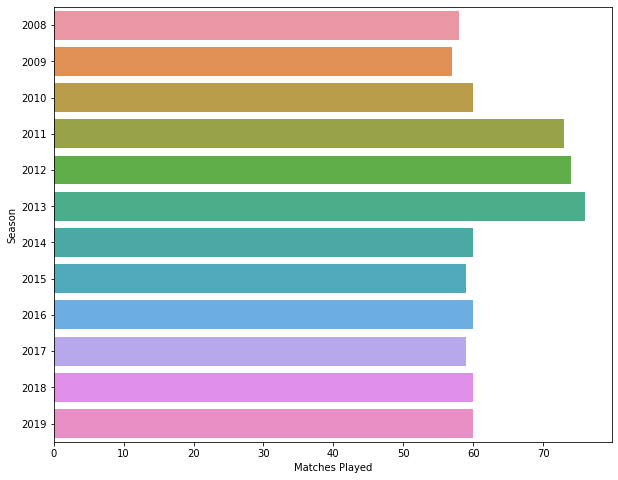

In [12]:
plt.figure(figsize=(10,8))
data = match.groupby(['id','season']).count().index.droplevel(level=0).value_counts().sort_index()
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Matches Played')
plt.ylabel('Season')
plt.show()

Most number of Matches are carried off in 2013, 2012, 2011, which is more than 70

In [13]:
# Most IPL Matches played at a Venue

In [14]:
match.groupby(['venue','id']).count().droplevel(level=1).index.value_counts()

Eden Gardens                                            77
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
SuperSport Park                                         12
Sardar Patel Stadium, Motera                            12
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                       

In [15]:
# IPL Matches Played by Each Team

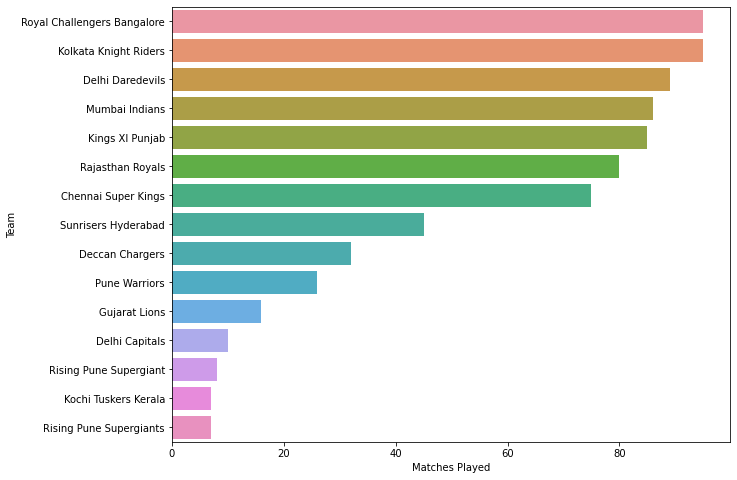

In [16]:
plt.figure(figsize=(10,8))
data = match['team2'].value_counts().sort_values(ascending=False)
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Matches Played')
plt.ylabel('Team')
plt.show()

In [17]:
# Match Winners

In [18]:
team_success = match['winner'].value_counts()
team_success

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

Mumbai Indians is the most successful team as they have secured most of the wins.

# Batting Analysis

In [19]:
# Most Runs Scored By an IPL Team

In [20]:
delivery.groupby(['batting_team'])['total_runs'].sum().sort_values(ascending=False)

batting_team
Mumbai Indians                 29809
Royal Challengers Bangalore    28126
Kings XI Punjab                27893
Kolkata Knight Riders          27419
Chennai Super Kings            26418
Delhi Daredevils               24388
Rajasthan Royals               22431
Sunrisers Hyderabad            17059
Deccan Chargers                11463
Pune Warriors                   6358
Gujarat Lions                   4862
Delhi Capitals                  2630
Rising Pune Supergiant          2470
Rising Pune Supergiants         2063
Kochi Tuskers Kerala            1901
Name: total_runs, dtype: int64

In [21]:
# Average Runs by Teams in Powerplay

In [22]:
delivery[delivery['over']<6].groupby(['match_id','batting_team']).sum()['total_runs'].groupby('batting_team').mean().sort_values(ascending=False)[2:]

batting_team
Sunrisers Hyderabad            39.759259
Rising Pune Supergiant         39.375000
Kolkata Knight Riders          39.179775
Delhi Daredevils               38.440994
Kings XI Punjab                38.392045
Kochi Tuskers Kerala           38.357143
Deccan Chargers                37.586667
Royal Challengers Bangalore    37.355556
Rajasthan Royals               37.157534
Chennai Super Kings            36.926829
Mumbai Indians                 36.818182
Rising Pune Supergiants        35.071429
Pune Warriors                  34.822222
Name: total_runs, dtype: float64

In [23]:
# Most IPL Century by a Batsman

In [24]:
runs = delivery.groupby(['batsman','match_id'])['batsman_runs'].sum()
runs[runs >= 100].droplevel(level=1).groupby('batsman').count().sort_values(ascending=False)[:15]

batsman
CH Gayle          7
V Kohli           5
DA Warner         4
SR Watson         4
AB de Villiers    3
HM Amla           2
AC Gilchrist      2
AM Rahane         2
V Sehwag          2
BB McCullum       2
SV Samson         2
KL Rahul          2
M Vijay           2
SPD Smith         1
SE Marsh          1
Name: batsman_runs, dtype: int64

In [25]:
# Highest Individual Score

In [26]:
delivery.groupby(['batsman','match_id'])['batsman_runs'].sum().sort_values(ascending=False)[:10]

batsman         match_id
CH Gayle        411         175
BB McCullum     60          158
AB de Villiers  562         133
RR Pant         7935        130
AB de Villiers  620         129
CH Gayle        372         128
M Vijay         206         127
DA Warner       36          126
V Sehwag        516         122
SR Watson       7953        121
Name: batsman_runs, dtype: int64

In [27]:
# Most IPL Fifty by a Batsman

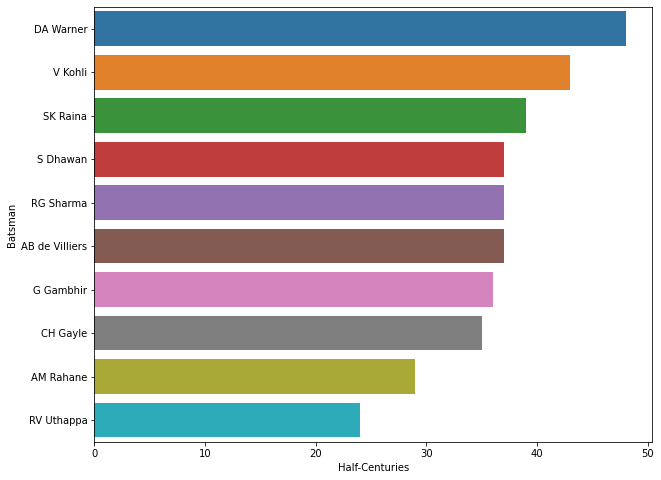

In [28]:
plt.figure(figsize=(10,8))
runs = delivery.groupby(['batsman','match_id'])['batsman_runs'].sum()
data = runs[runs >= 50].droplevel(level=1).groupby('batsman').count().sort_values(ascending=False)[:10]
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Half-Centuries')
plt.ylabel('Batsman')
plt.show()

In [29]:
# Highest Total Runs in IPL

In [30]:
delivery.groupby(['match_id','batting_team']).sum()['total_runs'].droplevel(level=0).sort_values(ascending=False)[:10]

batting_team
Royal Challengers Bangalore    263
Kolkata Knight Riders          250
Royal Challengers Bangalore    248
Chennai Super Kings            246
Kolkata Knight Riders          241
Chennai Super Kings            240
Royal Challengers Bangalore    235
Sunrisers Hyderabad            233
Kings XI Punjab                232
Sunrisers Hyderabad            232
Name: total_runs, dtype: int64

In [31]:
# Most IPL Sixes hit by Batsman

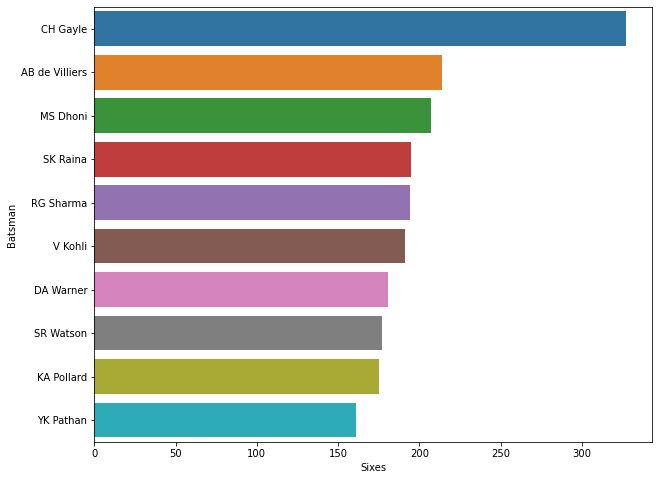

In [32]:
plt.figure(figsize=(10,8))
data = delivery[delivery['batsman_runs'] == 6]['batsman'].value_counts()[:10]
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Sixes')
plt.ylabel('Batsman')
plt.show()

In [33]:
# Winning probability of the teams over the years, with the help of a barplot

C:\Users\thoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Sunrisers Hyderabad'),
  Text(1, 0, 'Rising Pune Supergiant'),
  Text(2, 0, 'Kolkata Knight Riders'),
  Text(3, 0, 'Kings XI Punjab'),
  Text(4, 0, 'Royal Challengers Bangalore'),
  Text(5, 0, 'Mumbai Indians'),
  Text(6, 0, 'Delhi Daredevils'),
  Text(7, 0, 'Gujarat Lions'),
  Text(8, 0, 'Chennai Super Kings'),
  Text(9, 0, 'Rajasthan Royals'),
  Text(10, 0, 'Deccan Chargers'),
  Text(11, 0, 'Pune Warriors'),
  Text(12, 0, 'Kochi Tuskers Kerala'),
  Text(13, 0, 'Rising Pune Supergiants'),
  Text(14, 0, 'Delhi Capitals')])

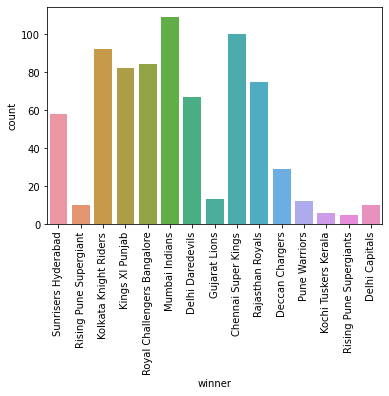

In [34]:
sns.countplot(match['winner'])
plt.xticks(rotation = 90)

In [35]:
# Winning Probablity of Batting First Team

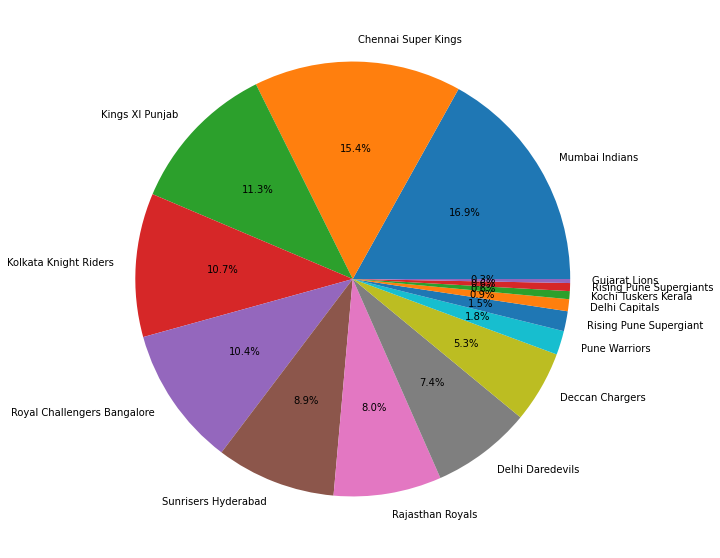

In [36]:
batting_first=match[match['win_by_runs']!=0]

plt.figure(figsize=(10,10))
plt.pie(list(batting_first['winner'].value_counts()),labels=list(batting_first['winner'].value_counts().keys()),autopct='%0.1f%%')
plt.show()

In [37]:
# Team who won more matches while batting second.

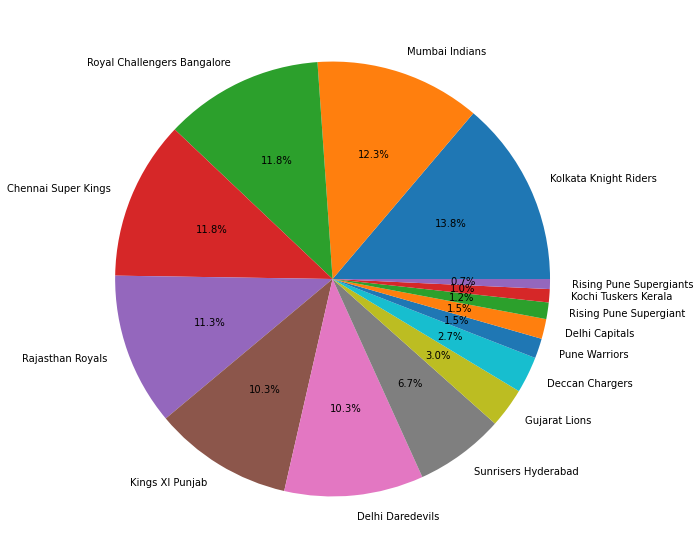

In [38]:
batting_second=match[match['win_by_wickets']!=0]
plt.figure(figsize=(10,10))

plt.pie(list(batting_second['winner'].value_counts()),labels=list(batting_second['winner'].value_counts().keys()),autopct='%0.1f%%')

plt.show()

While chasing the target, Kolkata Knight Riders won the highest number of matches.

In [39]:
# Teams - Win by Runs 

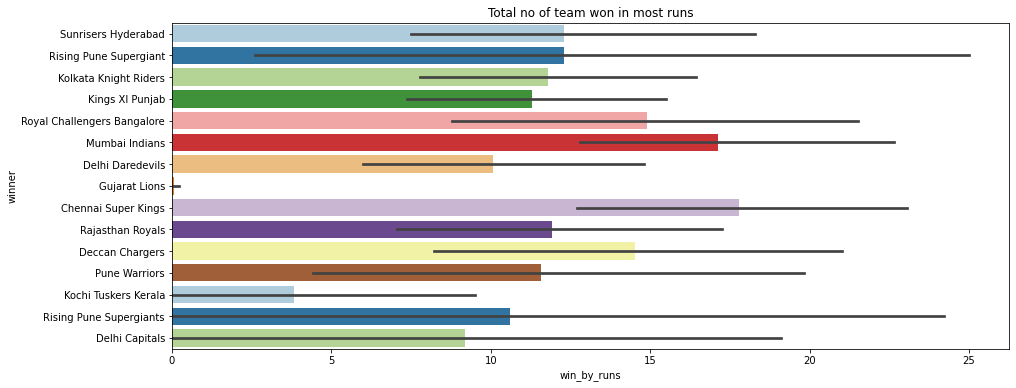

In [40]:
plt.figure(figsize=(15,6))
plt.title("Total no of team won in most runs")
sns.barplot(x='win_by_runs', y='winner', data=match, palette='Paired');

In [41]:
# Teams - Win by Wickets

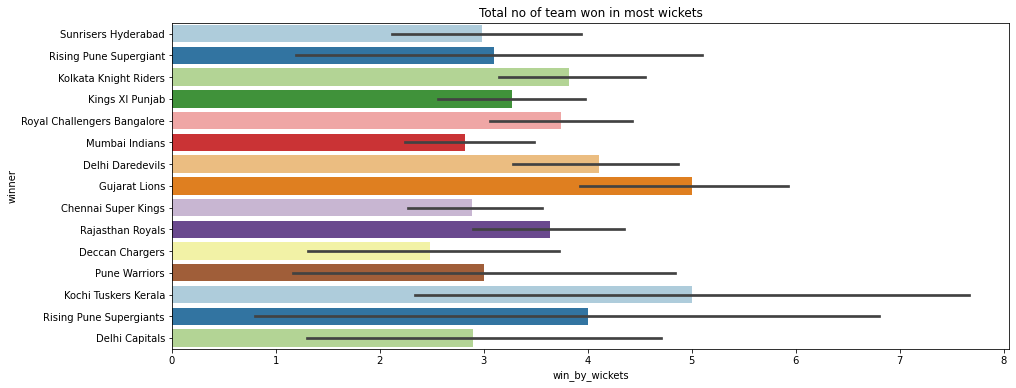

In [42]:
plt.figure(figsize=(15,6))
plt.title("Total no of team won in most wickets")
sns.barplot(x='win_by_wickets', y='winner', data=match, palette='Paired');

# Bowling Statistics

In [43]:
# Most run conceded by a bowler in an inning

In [44]:
delivery.groupby(['bowler','match_id'])['total_runs'].sum().droplevel(level=1).sort_values(ascending=False)[:10]

bowler
M Ur Rahman       73
Basil Thampi      71
TG Southee        68
PP Chawla         67
Sandeep Sharma    66
I Sharma          66
PJ Cummins        65
UT Yadav          65
VR Aaron          63
AB Dinda          63
Name: total_runs, dtype: int64

In [45]:
# Most IPL Wickets by a Bowler

In [46]:
delivery['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [47]:
lst = {'caught','bowled','lbw','stumped','caught and bowled','hit wicket'}
delivery[delivery['dismissal_kind'].apply(lambda x: True if x in lst and x != ' ' else False)]['bowler'].value_counts()[:10]

SL Malinga         170
A Mishra           156
Harbhajan Singh    150
PP Chawla          149
DJ Bravo           147
B Kumar            133
R Ashwin           125
SP Narine          122
UT Yadav           119
RA Jadeja          108
Name: bowler, dtype: int64

In [48]:
# Most dot ball by a Bowler

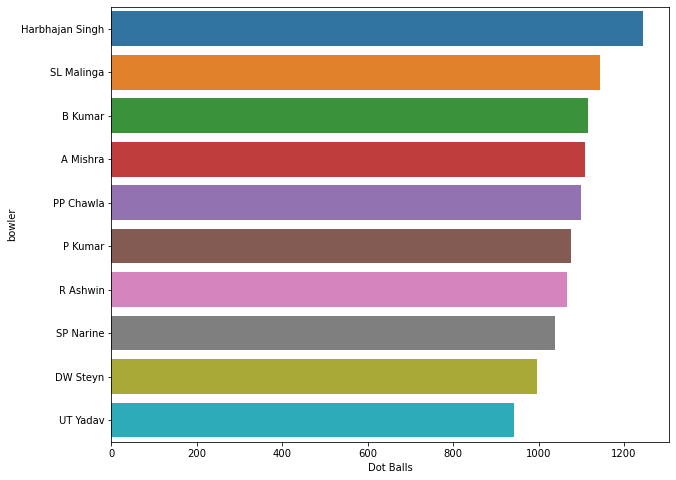

In [49]:
plt.figure(figsize=(10,8))
data = delivery[delivery['total_runs'] == 0].groupby('bowler').count()['match_id'].sort_values(ascending=False)[:10]
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Dot Balls')
plt.ylabel('bowler')
plt.show()

In [50]:
# Most Maiden over by a Bowler

In [51]:
data = delivery.groupby(['match_id','bowler','over'])['total_runs'].sum()
data = data[data.values == 0].droplevel(level=[0,2])
data.index.value_counts()[:10]

P Kumar           12
IK Pathan          9
DW Steyn           8
SL Malinga         8
B Kumar            7
DS Kulkarni        7
DJ Bravo           6
Sandeep Sharma     6
R Ashwin           5
Z Khan             5
Name: bowler, dtype: int64

In [52]:
# Most Wicket by an IPL Team

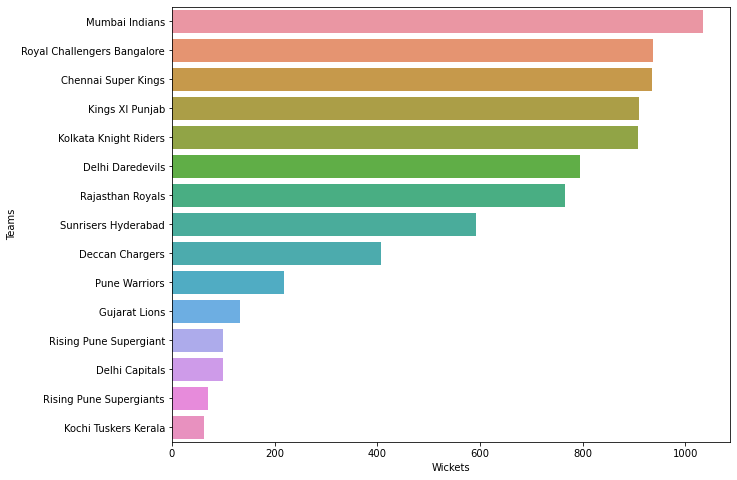

In [53]:
plt.figure(figsize=(10,8))
lst = {'caught','bowled','lbw','stumped','caught and bowled','hit wicket'}
data = delivery[delivery['dismissal_kind'].apply(lambda x: True if x in lst and x != ' ' else False)]['bowling_team'].value_counts()
delivery.groupby(['batting_team'])['extra_runs'].agg('sum').sort_values(ascending=False)
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Wickets')
plt.ylabel('Teams')
plt.show()

In [54]:
# Most No-Balls by an IPL team

In [55]:
delivery.groupby(['batting_team'])['noball_runs'].agg('sum').sort_values(ascending=False)

batting_team
Royal Challengers Bangalore    96
Chennai Super Kings            90
Mumbai Indians                 90
Kolkata Knight Riders          86
Rajasthan Royals               86
Delhi Daredevils               73
Kings XI Punjab                64
Deccan Chargers                49
Sunrisers Hyderabad            47
Pune Warriors                  24
Gujarat Lions                  17
Kochi Tuskers Kerala           11
Delhi Capitals                  8
Rising Pune Supergiants         7
Rising Pune Supergiant          1
Name: noball_runs, dtype: int64

In [56]:
# Most No-Balls by an IPL Bowler

In [57]:
delivery[delivery['noball_runs'] != 0]['bowler'].value_counts()[:10]

S Sreesanth    23
JJ Bumrah      22
I Sharma       21
A Mishra       20
SL Malinga     18
UT Yadav       18
AB Dinda       14
SR Watson      13
RP Singh       13
JA Morkel      13
Name: bowler, dtype: int64

# Pre-Processing

In [58]:
match[match['winner'].isnull() == True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [59]:
match['winner'].fillna('Match drop', inplace = True)

In [60]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           756 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [61]:
match[match['player_of_match'].isnull() == True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,Match drop,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,Match drop,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,Match drop,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,Match drop,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [62]:
match['player_of_match'].fillna('None', inplace = True)

In [63]:
match.drop(['umpire1','umpire2','umpire3'],axis=1, inplace = True)

In [64]:
match['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cuttack             7
Ranchi              7
Port Elizabeth      7
Cape Town           7
Abu Dhabi           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: city, dtype: int64

In [65]:
match[match['city'].isnull()== True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium


In [66]:
match['city'].fillna('Dubai', inplace = True)

In [67]:
match.isna().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
dtype: int64

# Feature Engineering

In [68]:
#finding total runs
delivery.groupby(['match_id','inning']).sum()['total_runs']

match_id  inning
1         1         207
          2         172
2         1         184
          2         187
3         1         183
                   ... 
11413     2         170
11414     1         155
          2         162
11415     1         152
          2         157
Name: total_runs, Length: 1528, dtype: int64

In [69]:
#finding total runs in innings=1,target
total_score_df= delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()
total_score_df = total_score_df[total_score_df['inning'] == 1]

In [70]:
total_score_df

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [71]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')
match_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,match_id,total_runs
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",1,207
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,2,184
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,3,183
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,4,163
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,5,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,11347,143
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,11412,136
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,11413,171
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,11414,155


In [72]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [73]:
teams = ['Mumbai Indians',
    'Kolkata Knight Riders',
    'Royal Challengers Bangalore',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Kings XI Punjab',
    'Sunrisers Hyderabad',
    'Delhi Capitals']

In [74]:
match_df['team1']=match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2']=match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1']=match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2']=match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')


In [75]:
match_df=match_df[match_df['team1'].isin(teams)]
match_df=match_df[match_df['team2'].isin(teams)]

In [76]:
match_df.shape

(641, 17)

In [77]:
#dealing dl applied
match_df['dl_applied'].value_counts()

0    626
1     15
Name: dl_applied, dtype: int64

In [78]:
match_df=match_df[match_df['dl_applied']==0]

In [79]:
match_df=match_df[['match_id','city','winner','total_runs',]]

In [80]:
delivery_df=match_df.merge(delivery,on='match_id')
delivery_df=delivery_df[delivery_df['inning']==2]
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [81]:
delivery_df.shape

(72413, 24)

In [82]:
delivery_df.groupby('match_id').cumsum()['total_runs_y']

125         1
126         1
127         1
128         3
129         7
         ... 
149573    152
149574    154
149575    155
149576    157
149577    157
Name: total_runs_y, Length: 72413, dtype: int64

In [83]:
#Finding the current score
delivery_df['current_score']=delivery_df.groupby('match_id').cumsum()['total_runs_y']
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,1,0,1,NaN,NaN,NaN,1
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,2,0,2,NaN,NaN,NaN,3
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,4,0,4,NaN,NaN,NaN,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,1,0,1,NaN,NaN,NaN,152
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,2,0,2,NaN,NaN,NaN,154
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,1,0,1,SR Watson,run out,KH Pandya,155
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,2,0,2,NaN,NaN,NaN,157


In [84]:
#finding runs left
delivery_df['runs_left']=delivery_df['total_runs_x']-delivery_df['current_score']


In [85]:
#finding balls left
delivery_df['balls_left']= 126-(delivery_df['over']*6+delivery_df['ball'])
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,206,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,204,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,200,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,152,0,4
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,154,-2,3
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-3,2
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,157,-5,1


In [86]:
#finding wickets left
delivery_df['player_dismissed']=delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed']=delivery_df['player_dismissed'].apply(lambda x:x if x=="0" else "1")
delivery_df['player_dismissed']=delivery_df['player_dismissed'].astype('int')
wickets=delivery_df.groupby('match_id').cumsum()['player_dismissed'].values
delivery_df['wickets']=10-wickets
delivery_df.tail()


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,1,0,NaN,NaN,152,0,4,5
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,2,0,NaN,NaN,154,-2,3,5
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,0,1,1,run out,KH Pandya,155,-3,2,4
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,2,0,NaN,NaN,157,-5,1,4
149577,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,...,0,0,0,1,lbw,NaN,157,-5,0,3


In [87]:
#finding crr 
#current run rate=runs/overs
delivery_df['crr']=(delivery_df['current_score']*6)/(120-delivery_df['balls_left'])

In [88]:
#finding rrr
delivery_df['rrr']=(delivery_df['runs_left']*6)/delivery_df['balls_left']

In [89]:
#result
def result(row):
  return 1 if row['batting_team']== row['winner'] else 0


In [90]:
delivery_df['result']=delivery_df.apply(result,axis=1)
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr,result
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,NaN,NaN,1,206,119,10,6.000000,10.386555,0
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,NaN,NaN,1,206,118,10,3.000000,10.474576,0
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,NaN,NaN,1,206,117,10,2.000000,10.564103,0
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,NaN,NaN,3,204,116,10,4.500000,10.551724,0
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,NaN,NaN,7,200,115,10,8.400000,10.434783,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,NaN,NaN,152,0,4,5,7.862069,0.000000,0
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,NaN,NaN,154,-2,3,5,7.897436,-4.000000,0
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,run out,KH Pandya,155,-3,2,4,7.881356,-9.000000,0
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,NaN,NaN,157,-5,1,4,7.915966,-30.000000,0


In [91]:
#extracting final datas
final_df=delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,119,10,207,6.000000,10.386555,0
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,118,10,207,3.000000,10.474576,0
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,117,10,207,2.000000,10.564103,0
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,204,116,10,207,4.500000,10.551724,0
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,200,115,10,207,8.400000,10.434783,0
...,...,...,...,...,...,...,...,...,...,...
149573,Chennai Super Kings,Mumbai Indians,Hyderabad,0,4,5,152,7.862069,0.000000,0
149574,Chennai Super Kings,Mumbai Indians,Hyderabad,-2,3,5,152,7.897436,-4.000000,0
149575,Chennai Super Kings,Mumbai Indians,Hyderabad,-3,2,4,152,7.881356,-9.000000,0
149576,Chennai Super Kings,Mumbai Indians,Hyderabad,-5,1,4,152,7.915966,-30.000000,0


In [92]:
final_df.sample(final_df.shape[0])

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
119685,Sunrisers Hyderabad,Kings XI Punjab,Chandigarh,154,99,10,179,7.142857,9.333333,1
110390,Mumbai Indians,Chennai Super Kings,Chennai,72,48,7,158,7.166667,9.000000,1
76798,Chennai Super Kings,Kolkata Knight Riders,Kolkata,108,111,10,119,7.333333,5.837838,1
44205,Rajasthan Royals,Mumbai Indians,Jaipur,116,62,6,174,6.000000,11.225806,0
51084,Rajasthan Royals,Kings XI Punjab,Chandigarh,105,46,6,195,7.297297,13.695652,0
...,...,...,...,...,...,...,...,...,...,...
28647,Rajasthan Royals,Deccan Chargers,Kimberley,75,30,4,166,6.066667,15.000000,0
123073,Royal Challengers Bangalore,Kings XI Punjab,Bengaluru,128,96,9,161,8.250000,8.000000,1
137658,Delhi Capitals,Kolkata Knight Riders,Delhi,38,24,8,193,9.687500,9.500000,1
64933,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata,159,95,9,190,7.440000,10.042105,0


In [93]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
93459,Chennai Super Kings,Kings XI Punjab,Cuttack,131,46,6,231,8.108108,17.086957,0


In [94]:
final_df.dropna(inplace= True)

C:\Users\thoma\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [95]:
final_df=final_df[final_df['balls_left']!=0]

In [96]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [97]:
X=final_df.iloc[:,:-1]
y=final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [98]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
45642,Deccan Chargers,Kings XI Punjab,Dharamsala,54,42,8,174,9.230769,7.714286
28657,Rajasthan Royals,Deccan Chargers,Kimberley,68,21,1,166,5.939394,19.428571
98799,Rajasthan Royals,Kings XI Punjab,Chandigarh,139,86,9,179,7.058824,9.697674
640,Mumbai Indians,Kolkata Knight Riders,Mumbai,161,105,10,178,6.800000,9.200000
81563,Royal Challengers Bangalore,Sunrisers Hyderabad,Bangalore,137,96,10,161,6.000000,8.562500
...,...,...,...,...,...,...,...,...,...
77289,Delhi Daredevils,Mumbai Indians,Delhi,110,91,10,161,10.551724,7.252747
13321,Mumbai Indians,Rajasthan Royals,Mumbai,97,107,10,103,2.769231,5.439252
114034,Chennai Super Kings,Mumbai Indians,Kolkata,113,46,8,202,7.216216,14.739130
1867,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata,107,57,8,172,6.190476,11.263158


In [99]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
trf= ColumnTransformer([
     ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
     ]
     ,remainder='passthrough')

In [100]:
from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
pipe = Pipeline(steps=[
                       ('step1',trf),
                       ('step2',LogisticRegression(solver ='liblinear'))
])

In [101]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [102]:
y_pred = pipe.predict(X_test)

In [103]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8040872878420505

In [104]:
pipe.predict_proba(X_test)[10]

array([0.19263902, 0.80736098])

In [105]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))